# Single user training

In this notebook we evaluate how a model performs when trained on a single user data.

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

from core.rnn import create_model, train, load_data

LABELS = ["walking", "stairs_down", "stairs_up", "sitting", "standing", "laying"]

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 55,014
Trainable params: 55,014
Non-trainable params: 0
_________________________________________________________________
Train on 327 samples, validate on 82 samples
Epoch 1/50
327/327 [==============================] - 4s 13ms/step - loss: 1.7443 - acc: 0.2508 - val_loss: 1.6874 - val_acc: 0.2927
Epoch 2/50
327/327 [==============================] - 4s 11ms/step - loss: 1.5774 - acc: 0.3700 - val_loss: 2.2297 - val_acc: 0.3171
Epoch 3/50
327/327 [==============================] - 4s 11ms/step - loss: 1.6752 - acc: 0.

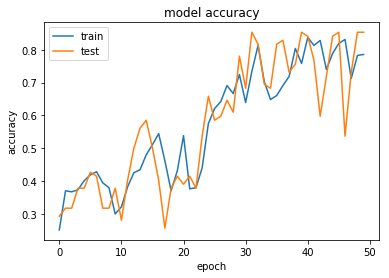

In [5]:
model = create_model(128, LABELS)

# Load the data from uci_train_6_single.csv which is a subset of the UCI training set
# containing only the user 25 (the user who collected more data)
x, y = load_data("../data/uci_train_6_single.csv", 128, LABELS)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=np.random.randint(0, 42)
)

train(
    model,
    x_train,
    y_train,
    x_test,
    y_test,
    epochs=50,
    batch_size=16
)

## Single user testing

The data was split in (80% training, 20% testing). The model was evaluated using the testing data, yielding good results, with an accuracy higher than 90%.

## Multi user testing

We will now evaluate the previously trained model against the real test data, containing other users' observations.

In [4]:
x_real_test, y_real_test = load_data("../data/uci_test_6.csv", 128, LABELS)

[_, accuracy] = model.evaluate(x_real_test, y_real_test, 512)

print(f"\nTest Accuracy: {accuracy}")

2947/2947 [==============================] - 0s 156us/step

Test Accuracy: 0.4282320970634626


### Results

With a ~50% accuracy the model shows it has indeed learned something, considering that a random guess would have a (1/6 = 16.6%) accuracy, but it is very far from the ~90% accuracy of the model trained using the multiuser data.